# PHYS3153 O4 Experiment 

In this experiment, students need to prepare the 6 samples with different molarities and place then into spectrometor(with light source, diffraction grating, rotating arm, and light sensor). Firslty, we place the samples in front of light sensor. Then, when we rotate the rotating arm, the diffraced colored light will penetrad the samples. The intensity and the angular position(rad) are recorded by light sensor. In this experiment, we want to find out the absorbed wavelength of the samples. 

In this code, we only use the data of one sample for illustation. The procedures are same when we so data analysis on other samples. 

In [1]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("darkgrid")

# Read the raw data using Pandas

As the sample rate is 50Hz (taking 50 data in one second), we need to consolidate the data by finding the mean of each set of recorded angular position. 

The pd.DataFrame.groupby function can group data to particular things. In here, we need to consolidate the data by finding the mean value of intensity of each angular position. Therefore, we use groupby to group the intensity data by the angular position and then take the mean values of the intenisty. 

The detailed discussion on pd.DataFrame.groupby:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [2]:
# Read the csv/ txt file by using pd.read_csv
# For txt file, you may need to set the delimeter = "\t"

data = pd.read_csv("O4_data.csv", header = 2, names=["Pos(rad)","Intensity"])
data

,Pos(rad),Intensity
0,-0.000073,13.5
1,-0.000073,13.5
2,-0.000073,13.5
3,-0.000073,13.5
4,-0.000073,13.5
...,...,...
6446,0.854000,34.7
6447,0.854000,34.7
6448,0.854000,34.7
6449,0.854000,34.7


In [3]:
# Consolidate the data by using groupby function 
con_data = data.groupby(data.columns[0]).mean()
con_data

,Intensity
Pos(rad),
-0.000073,13.429577
0.000000,13.457143
0.000073,13.525000
0.000145,13.600000
0.000218,13.685714
...,...
0.850000,35.783333
0.851000,35.540000
0.852000,35.128571


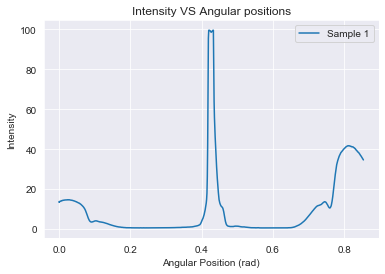

In [4]:
# plot Intensity VS Angular positions Graph
plt.title("Intensity VS Angular positions")
plt.plot(con_data.index.values, con_data.values, label="Sample 1")
plt.xlabel("Angular Position (rad)")
plt.ylabel("Intensity")
plt.legend()

# Shift the Peak to Origin 

For someone who forget to place the light sensor in angular position=0 (highest intensity place) initially, we need to modify the data such that the peak is centered at origin in order to getthe correct results. If you place the light sensor at rad =0 initially, you can skip this step.

In [5]:
# Find the angular position with max intensity first
con_data[con_data.values == con_data.values.max()]

,Intensity
Pos(rad),
0.433,99.611111


In [6]:
# after finding the radian of highest intensity, 
# we substract our data this values for radian larger than it.
# then we can shift the peak into center

# get the data with ang pos > 0.433. For ang pos =<0.433, they are useless for us
real_data = con_data[con_data.index > 0.433]

# substract the whole angular pos data with 0.433, then we define new_index as it
new_index = real_data.index.values -(0.433)

# use "new_index " as our new index data
real_data = real_data.set_index(new_index)

# rename the index 
real_data.rename_axis("Pos(rad)", axis="index", inplace = True)

In [7]:
# Shoe real_data 
real_data

,Intensity
Pos(rad),
0.001,79.471429
0.002,63.971429
0.003,55.966667
0.004,50.775000
0.005,46.133333
...,...
0.417,35.783333
0.418,35.540000
0.419,35.128571


# Calcualtion of wavelength(nm) 

After getting the correct angular positions, we can use it to calculate the wavelength of each point by using the equation for diffraction (for first order diffracted light) 

In [8]:
# define a function to find the wavelength of the light in (nm)
def wavelength(con_data_index_val, con_data, **arg):
    w =  10000/6*(np.sin(con_data_index_val))
    return w

wavelength_1 = wavelength(real_data.index.values, real_data)

In [9]:
wavelength_1

array([  1.66666639,   3.33333111,   4.9999925 ,   6.66664889,
         8.33329861,   9.99994   ,  11.66657139,  13.33319111,
        14.9997975 ,  16.66638889,  18.33296361,  19.99952   ,
        21.66605639,  23.33257112,  24.99906251,  26.6655289 ,
        28.33196863,  29.99838003,  31.66476142,  33.33111116,
        34.99742756,  36.66370896,  38.3299537 ,  39.99616011,
        41.66232652,  43.32845128,  44.9945327 ,  46.66056913,
        48.3265589 ,  49.99250034,  51.65839179,  53.32423158,
        54.99001804,  56.65574952,  58.32142434,  59.98704084,
        61.65259735,  63.31809221,  64.98352375,  66.64889031,
        68.31419022,  69.97942182,  71.64458343,  73.3096734 ,
        74.97469006,  76.63963175,  78.3044968 ,  79.96928354,
        81.63399031,  83.29861545,  84.96315729,  86.62761417,
        88.29198442,  89.95626638,  91.62045838,  93.28455876,
        94.94856586,  96.612478  ,  98.27629354,  99.9400108 ,
       101.60362812, 103.26714383, 104.93055628, 106.59

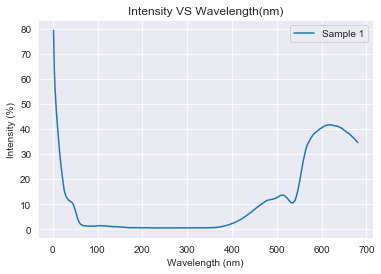

In [10]:
# Plot of the Intensity vs Wavelength graph 
plt.title("Intensity VS Wavelength(nm)")
plt.plot(wavelength_1, real_data.values,label= "Sample 1")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (%)")
plt.legend()

# Find the absorbed wavelength(nm) 

As we can see that, the absorbed wavelength is between 500nm and 600nm. We can find the minimum intensity value in this data first and them find the corresponded wavelength 

In [11]:
# Find absorbed wavelength

# Define a dataframe for the intensity 
absorb = pd.DataFrame(real_data.values, columns=["Intensity"])
# set the index to the previous result of wavelengths 
absorb = absorb.set_index(wavelength_1)
# rename the index to wavelength
absorb.rename_axis("Wavelength(nm)", axis="index", inplace= True)

In [12]:
# show the data frame of wavelength and intensity
absorb

,Intensity
Wavelength(nm),
1.666666,79.471429
3.333331,63.971429
4.999993,55.966667
6.666649,50.775000
8.333299,46.133333
...,...
675.032259,35.783333
676.555768,35.540000
678.078601,35.128571


In [13]:
# find the min value and the absorbed wavelength 
absorb[absorb.values == absorb[500:600].values.min() ]

,Intensity
Wavelength(nm),
535.339079,10.5


The absorbed wavelength is 535.3nm with intensity 10.5%